<a href="https://colab.research.google.com/github/ploutonn/MNIST/blob/main/Copy_of_MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy.ndimage.interpolation import shift

<ipython-input-1-b4ef42466b4e>:6: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [2]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [49]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

def shift_image(image, dx, dy):
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape((1,28,28))
i=0

x_train_new=x_train
y_train_new=y_train

y_train_new=np.insert(y_train_new,60000,y_train)
y_train_new=np.insert(y_train_new,120000,y_train)

x_test_new=x_test
y_test_new=y_test
y_test_new=np.insert(y_test_new,10000,y_test)
y_test_new=np.insert(y_test_new,20000,y_test)
print(
    f'Training Size - Inputs:{x_train_new.shape}, Targets:{y_train_new.shape}'
    f'\nTest Size - Inputs:{x_test_new.shape}, Targets:{y_test_new.shape}'
)
for dx, dy in ((1,1), (-1,-1)):
    for image, label in zip(x_train, y_train):
             x_train_new=np.insert(x_train_new,60000+i,shift_image(image, dx, dy),0)
             i=i+1
             print(f'{i}')
i=0


for dx, dy in ((1,1), (-1,-1)):
    for image, label in zip(x_test, y_test):
             x_test_new=np.insert(x_test_new,10000+i,shift_image(image, dx, dy),0)
             i=i+1
             print(f'{i}')
print(
    f'Training Size - Inputs:{x_train_new.shape}, Targets:{y_train_new.shape}'
    f'\nTest Size - Inputs:{x_test_new.shape}, Targets:{y_test_new.shape}'
)

Training Size - Inputs:(60000, 28, 28), Targets:(180000,)
Test Size - Inputs:(10000, 28, 28), Targets:(30000,)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
2

KeyboardInterrupt: 

In [34]:
rows = 5
digits_per_row = 5

Exception ignored in: <function _xla_gc_callback at 0x7d4a8783e200>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


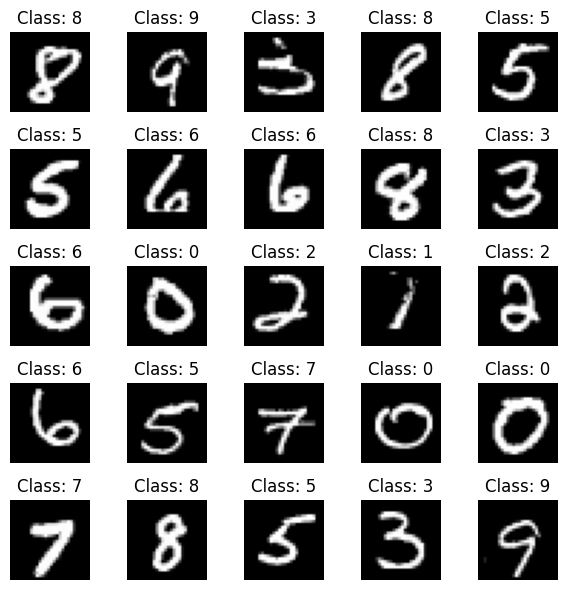

In [35]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 180000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train_new.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train_new[idx], cmap='gray')
    ax.set_title(f'Class: {y_train_new[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [36]:
x_train_new = x_train_new.reshape((60000, 784))
y_train_new = tf.one_hot(y_train_new, depth=10)
x_test_new = x_test_new.reshape((10000, 784))
y_test_new = tf.one_hot(y_test_new, depth=10)

print(
    f'Training Size - Inputs:{x_train_new.shape}, Targets:{y_train_new.shape}'
    f'\nTest Size - Inputs:{x_test_new.shape}, Targets:{y_test_new.shape}'
)

Training Size - Inputs:(60000, 784), Targets:(60000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [37]:
activation = 'sigmoid'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 30

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=588, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=392, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=196, activation=activation, name='hidden-3'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 588)               461580    
                                                                 
 hidden-2 (Dense)            (None, 392)               230888    
                                                                 
 hidden-3 (Dense)            (None, 196)               77028     
                                                                 
 outputs (Dense)             (None, 10)                1970      
                                                                 
Total params: 771466 (2.94 MB)
Trainable params: 771466 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train_new,
    y=y_train_new,
    batch_size=128,
    epochs=epochs,
    validation_data=(x_test_new, y_test_new),
    shuffle=True
    )

Epoch 1/30
148/469 [========>.....................] - ETA: 5s - loss: 2.0981 - accuracy: 0.5611

KeyboardInterrupt: 

# Display Loss and Accuracy per Training Epoch

In [2]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

NameError: name 'history' is not defined

In [1]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

NameError: name 'plt' is not defined

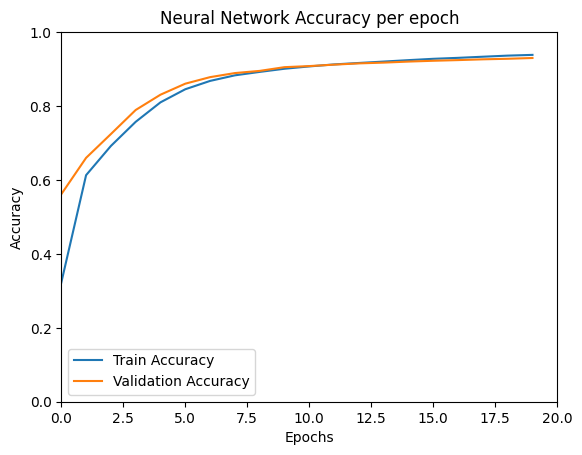

In [ ]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


## 2. Validation: Show 1 misclassified digit from each class.

## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

## 4. Upload the exercise in your GitHub repository. Google Colab can instantly deploy this notebook into a Github repository.

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
